<a href="https://colab.research.google.com/github/gitnicolas343/Quamtum_machine_learning/blob/main/QUAMTUM_GATES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet
!pip install pylatexenc --quiet

In [77]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Operator, Statevector
from qiskit.circuit.library import UnitaryGate
from qiskit.circuit.library import XGate, HGate, MCXGate, CXGate , ZGate

from pylatexenc.latex2text import LatexNodes2Text
from sympy import Matrix, I, symbols, Eq, simplify, eye, init_printing
import matplotlib.pyplot as plt
import numpy as np

# Sistemas cuánticos cerrados y transformaciones unitarias

---

En el estudio de la computación cuántica, es fundamental comprender cómo evoluciona el estado de un qubit cuando se encuentra en un sistema cerrado, es decir, aislado de cualquier interacción con el entorno externo, como un aparato de medición. Esta evolución está regida por principios físicos que imponen ciertas restricciones: debe ser lineal y reversible.

La linealidad, aunque puede parecer una simplificación sorprendente, ha sido confirmada repetidamente por la experimentación. Por otro lado, la reversibilidad se relaciona directamente con la conservación de la información: un sistema cerrado no puede destruir información sin la intervención de un agente externo. Según el principio de Landauer, borrar un bit de información requiere una cantidad mínima de energía proporcional a la temperatura del entorno. Por ello, si el sistema permanece cerrado, no puede haber pérdida de información ni entrada de energía, lo que implica que todas sus transformaciones deben ser reversibles.

el único estado determinista que transforma un bit clásico (Cbit)  en otro Cbit es la operación NOT y se define por la asignación lógica:


$$0 \mapsto \bar{0} = 1$$  
$$ 1 \mapsto \bar{1} = 0$$

donde la notación con barra indica negación lógica. La operación NOT puede resumirse como:
$$
x \mapsto \bar{x} = x \oplus 1,
$$
donde $\oplus$ denota la suma módulo 2 (XOR).

La matriz Pauli-X se define como:

$$
X = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix}
$$

Esta matriz intercambia los estados básicos $|0\rangle$, $|1\rangle$ , veamos:


$$
|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \quad
|1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}
$$

Entonces:

$$
X|0\rangle = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix}\begin{pmatrix}1 \\0\end{pmatrix}=\begin{pmatrix}0 \\1\end{pmatrix}= |1\rangle
$$

$$
X|1\rangle = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix}\begin{pmatrix}0 \\1\end{pmatrix}=\begin{pmatrix}1 \\0\end{pmatrix}= |0\rangle
$$

El estado del cbit en la salida de una operación NOT está dado por el vector de amplitud one-hot

$$
X|x\rangle = |\bar{x}\rangle = |x \oplus 1\rangle \tag{1.29}
$$

El símbolo  $\oplus$ denota la suma módulo 2 o operación XOR, que devuelve 1 si los bits son diferentes y 0 si son iguales.

Así:

* Si $ x = 0 $, entonces $ X|0\rangle = |1\rangle $
* Si $ x = 1 $, entonces $ X|1\rangle = |0\rangle $

Esto muestra que la compuerta Pauli-X invierte el estado del qubit, de manera análoga a la compuerta NOT clásica, pero en el contexto de una operación lineal reversible y unitaria.

#Esfera de Bloch
---


La **esfera de Bloch** es la representación geométrica estándar para un qubit puro. Cada estado  
$$
|\psi\rangle = \alpha_{0}\,\lvert0\rangle + \alpha_{1}\,\lvert1\rangle,\quad
|\alpha_{0}|^{2}+|\alpha_{1}|^{2}=1, \quad (1)
$$  
se corresponde con un punto sobre la superficie de la esfera unidad en $\mathbb{R}^3$.  


>  La esfera de Bloch es usada debido a que traduce el estado abstracto de un qubit, definido por dos amplitudes complejas lo cual permite observar si el qubit está en cierto estado (para fines prácticos de este notebook) $|1\rangle$ o $|0\rangle$ o en algún estado puro $\alpha_0|0\rangle + \alpha_1|1\rangle$ (superposición inmediata).

---

## 1. Coordenadas esféricas del qubit

La esfera de Bloch utiliza el sistema de **coordenadas esféricas** para describir de forma compacta y visual el estado de un qubit puro:

- El ángulo polar $\theta\in[0,\pi]$ indica la “colatitud” desde el polo norte $\lvert0\rangle$) al polo sur $\lvert1\rangle$
- El ángulo azimutal $\varphi\in[0,2\pi)$ codifica la fase relativa entre las amplitudes de $\lvert0\rangle$ y $\lvert1\rangle$. De este modo, cualquier estado queda definido por:

$$
|\psi\rangle = \cos\frac{\theta}{2}\,\lvert0\rangle \;+\; e^{\,i\varphi}\sin\frac{\theta}{2}\,\lvert1\rangle \quad (2)
$$

Ademas se asocia al punto con coordenadas cartesianas  como:

$$
(r_x,r_y,r_z) = (\sin\theta\cos\varphi,\;\sin\theta\sin\varphi,\;\cos\theta) \quad(3)
$$

En la superficie de una  esfera de radio r = 1, lo cual facilita la interpretación geométrica de superposiciones y fases.

Vamos a detenernos a analizar un poco las implicaciones de la ecuacion (2) y (3)

1. **Ángulo polar $\theta$**  

   $$  
   \theta \;=\; 2\,\arccos\bigl(|\alpha_{0}|\bigr),  
   \qquad \theta\in[0,\pi].  
   $$  
   - $\theta=0$ polo norte $(\lvert0\rangle)$.  
   - $\theta=\pi$  polo sur $(\lvert1\rangle)$.  

2. **Ángulo azimutal $\varphi\$**

   $$  
   \varphi \;=\; \arg(\alpha_{1}) \;-\; \arg(\alpha_{0}),  
   \qquad \varphi\in[0,2\pi).  
   $$  
   Describe la fase relativa entre $\lvert0\rangle$ y $\lvert1\rangle$.  

3. **Vector de Bloch**  
   En coordenadas cartesianas:
   $$
   \mathbf{r} = (r_x,\,r_y,\,r_z)
   = \bigl(\sin\theta\cos\varphi,\;\sin\theta\sin\varphi,\;\cos\theta\bigr).
   $$  

Una interpretacion geometrica podria derivarse de pensar que  cualquier punto del ecuador $(\theta=\pi/2)$ representa una superposición con $|\alpha_{0}|=|\alpha_{1}|=1/\sqrt2$.
Mientras que la fase global no modifica $\mathbf{r}$, pues sólo la diferencia de fases entre amplitudes es relevante
y  $\|\mathbf{r}\|=1$ para estados puros.


## Ejemplo:

hagamos una breve implementación en Qiskit de una esfera de Bloch para un estado puro en superposición, supongamos:

- $R = 1$
- $\theta = \frac{\pi}{2}$
-$\varphi = \frac{\pi}{3}$

Para la superposicion:
$$
|\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + exp(\frac{i\pi}{3})|1\rangle)
$$

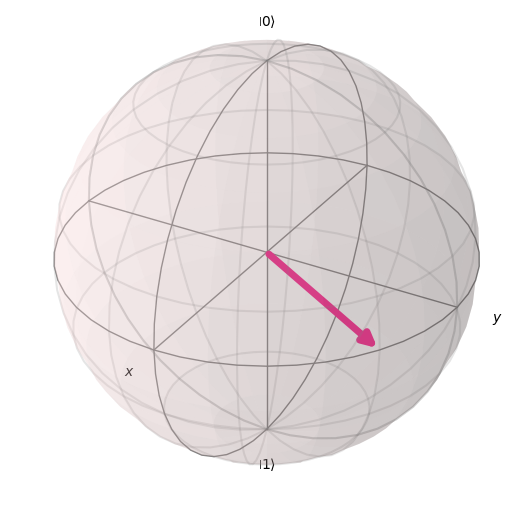

In [48]:
#parametros
r = 1
theta = np.pi/2
phi = np.pi/3

#vector en la esfera de Bloch
plot_bloch_vector([r, theta, phi], coord_type='spherical')


#Algunas propiedades:

---
1.La propiedad unitaria de la matriz de Pauli-X  cumpe que:

$$
XX^\dagger = X^\dagger X = I
$$
2.Cualquier transformación reversible sobre un qubit se representa por una matriz unitaria $U$ que cumple:

$$
UU^\dagger = UU^\dagger = I \quad  (4)
$$

Lo cual implica que $U^{-1} = U^\dagger$ y ademas preserva la norma del vector de estado:

$$
\|U|\psi\rangle\|^2 = \langle \psi | U^\dagger U | \psi \rangle = \langle \psi | \psi \rangle = 1 \quad (5)
$$

Esto garantiza que los estados cuánticos transformados sigan siendo válidos (con norma 1).

---

## *Transformaciones unitarias en sistemas cuánticos*

En mecánica cuántica, la evolución de un qubit en un sistema cerrado se describe mediante una transformación unitaria. Esto significa que, si el qubit está inicialmente en el estado $|\psi\rangle$, después de aplicarle una matriz unitaria $U$, su nuevo estado es:

$$|\psi'\rangle = U|\psi\rangle\quad \quad (6)$$

Esto refleja dos propiedades fundamentales, Linealidad ya que la operación $U$ es lineal, así que respeta la suma y el producto escalar.

Reversibilidad: como $U$ es una matriz unitaria, su inversa es su conjugada transpuesta, $U^{-1} = U^\dagger$.


Dado que $U$ es reversible, se puede recuperar el estado original $|\psi\rangle$ aplicando su inversa, es decir:

$$
|\psi\rangle = U^\dagger |\psi'\rangle \quad (8)
$$

Esto es importante puesto que  en un sistema cerrado, la información cuántica no se pierde por lo que  toda evolución es reversible.

vamos a comprobar la operacion anterior:  

tenemos el qubit $$|0\rangle$, en forma vectorial:

$$
|0\rangle = \begin{bmatrix} 1\\0 \end{bmatrix}
$$
la compuerta Pauli-X
$$
X|0\rangle = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix}\begin{pmatrix}1 \\0\end{pmatrix}=\begin{pmatrix}0 \\1\end{pmatrix}= |1\rangle
$$
Ahora $X^\dagger=((X)^T)^*$
$$
X^\dagger = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix} ^T =\begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix}^* = \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix}
$$
luego:
$$
X^\dagger |1\rangle  =  \begin{pmatrix}0 & 1 \\1 & 0\end{pmatrix} \begin{pmatrix}0\\1\end{pmatrix} =\begin{pmatrix}1\\0\end{pmatrix} = |0\rangle   
$$
vemos que se recupera el estado inicial.

ahora vamos a simularlo:

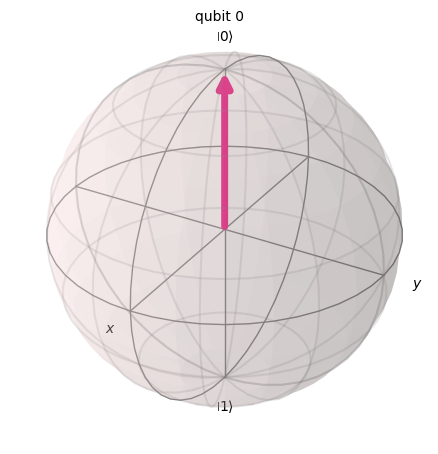

In [49]:
#un ejemplo sencillo de la aplicacion de una tranformacion unitaria U es comprobar la funcionalidad de la compuerta pauli-X
#como vimos funcina como la compuerta clasica NOT por lo que se espera que al aplicarla a al qubit  |1⟩ tenemos como resultado
#el qubit   |0⟩

#usando qiskit:

#definimos un qibit en  estado  |0⟩

estado_inicial = Statevector.from_label('0')

#visualizamos el estado en la esfera de bloch:

plot_bloch_multivector(estado_inicial)

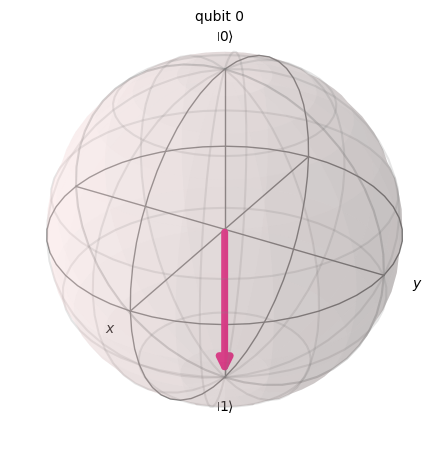

In [50]:
#la libreria de qiskit nos permite crear circuitos cuanticos o aplicar directemente la compuerta , lo cual en la
#practica se traduce en darle  intrucciones directas al procesador cuantico, algo analogo a lo que sucedia en los
#inicos de la computacion clasica, conocido como lenguaje de maquina.

#comenzaremos aplicando la compuerta pauli-X  al estado_1
x_operator = Operator(XGate())

#hacemos que el estado evolucione

state_after_x = estado_inicial.evolve(x_operator)

#podemos odservar su evolucion en la esfera de bloch

plot_bloch_multivector(state_after_x)

In [51]:
#ahora debemos comprobar que podemos revertir la operacion con X†

#podemos llevar las matrices de qiskit a expresiones matematicas y aplicar las operaciones requeridas:

compuerta = XGate().to_matrix()

#mostramos en consola
print(f'X = ')
Matrix(compuerta)


X = 


Matrix([
[  0, 1.0],
[1.0,   0]])

In [52]:
#podemos calcular la adjunta usando numpy:
compuerta_adjunta = np.matrix.getH(compuerta)

#mostramos en consola
print(f'X† = ')
Matrix(compuerta_adjunta)

X† = 


Matrix([
[  0, 1.0],
[1.0,   0]])

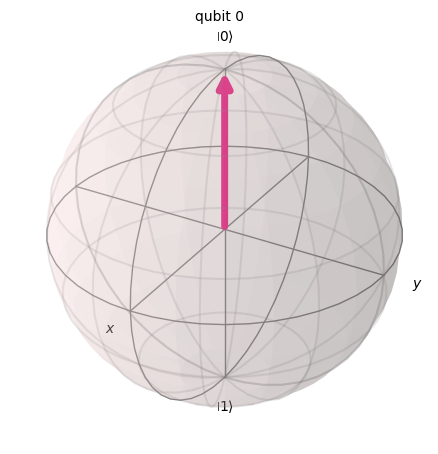

In [53]:
#y definirla como u operador de qiskit

operador_X_adj = Operator(compuerta_adjunta)

#una vez definido, podemos ver la evolucion al aplicarlo al qubit state_after_x que es la variable donde tenemos
#la operacion anterior

state_after_x_adj = state_after_x.evolve(operador_X_adj)

#vemos que el estado regreso al qubit  |0⟩

plot_bloch_multivector(state_after_x_adj)

---

# COMPUERTAS CUANTICAS

---

En computación cuántica, cualquier matriz unitaria
representa una evolución reversible y ademas conservar la norma del estado cuántico, puede  realizarse  (almenos en teoria) realizarse físicamente como la evolución de un sistema cuántico cerrado.

Cuando una matriz unitaria actúa sobre un solo qubit, se le llama puerta cuántica de un solo qubit. Estas puertas son los bloques fundamentales con los que se construyen operaciones más complejas en un computador cuántico.

Sin embargo, en la práctica, estas transformaciones unitarias no se implementan de una sola vez, sino que se construyen mediante una secuencia de puertas cuánticas más simples, tomadas de una "biblioteca" de operaciones básicas disponibles en el sistema cuántico que se está utilizando. A esta secuencia de transformaciones se le llama  un circuito cuántico.

Matemáticamente, esto significa que una transformación unitaria  $U$ más compleja puede expresarse como el producto de varias matrices unitarias más simples de la siguente forma:

$$
U = U_K \cdot U_{K-1} \cdot \cdots \cdot U_1 (9)
$$
Donde $U_K$ es una matriz de 2x2  con $k \in \{1, 2, \ldots, K\}$ representan las operaciones basicas de las compuertas cuanticas y su podructo se puede de las matrices unitaria los vimos en la ecuacion (4)

---

## Algunos ejemplos de compuertas cuanticas

A continuación se presentan algunas de las puertas cuánticas más comunes para un solo qubit:

| Nombre        | Notación        | Matriz                                                        |
|---------------|------------------|----------------------------------------------------------------|
| Identidad     | $I$              | $\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$                 |
| Pauli-X       | $X$              | $\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$                 |
| Pauli-Y       | $Y$              | $\begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$                |
| Pauli-Z       | $Z$              | $\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$                |
| Hadamard      | $H$              | $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$ |
| Rotación en Y | $R_Y(\theta)$    | $\begin{pmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{pmatrix}$ |

Estas puertas tienen propiedades algebraicas importantes. Por ejemplo, las matrices de Pauli $X$, $Y$ y $Z$ satisfacen relaciones cíclicas como:

$$
XY = iZ, \quad YZ = iX, \quad ZX = iY \quad (10)
$$

y son **anticommutativas**:

$$
P_1 P_2 = -P_2 P_1, \quad \text{para } P_1 \ne P_2 \text{ en } \{X, Y, Z\}. \quad (11)
$$

---

## Circuitos Cuánticos



En los circuitos cuánticos, la evolución de un qubit se representa gráficamente mediante un "alambre" (línea horizontal) sobre el cual se aplican puertas cuánticas de izquierda a derecha.

Cabe destacar que el orden en que se aplican las matrices $U_1, U_2, \ldots, U_K$ se vio en la expresión del producto de la ecuación (9) , es inverso al orden en que se aplican visualmente las puertas en el circuito: la puerta más cercana al qubit de entrada (más a la izquierda en el dibujo) es la **última** que actúa desde el punto de vista matricial.


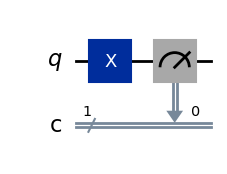

In [54]:
#ejemlo basico de un circuito cuantico con una sola compuerta

qc = QuantumCircuit(1,1)  #esta linea inicia por defecto un cicuito cuantico en  |0⟩
qc.x(0)                   #una forma de agregar una instruccion al circuito para la comuerta Pauli - X
qc.measure(0,0)           #una medicion del Qubit
qc.draw("mpl")            #dibujo del circuito

## Diagramas de amplitud

---

En los circuitos cuánticos, un qubit se representa como un alambre horizontal y las puertas cuánticas se dibujan como cajas que modifican el estado del qubit, avanzando de izquierda a derecha.

Ahora, mientras que los circuitos cuánticos nos muestran qué operación se aplica y en qué orden, los diagramas de amplitud nos muestran cómo cambian los valores complejos de las amplitudes $\alpha_0$ y $\alpha_1$ que forman el estado de un qubit:

$$
|\psi\rangle = \alpha_0 |0\rangle + \alpha_1 |1\rangle
$$

En estos diagramas hay dos líneas, una para $\alpha_0$ y otra para $ \alpha_1 $ , se visualiza cómo cambian al pasar por una puerta cuántica,  Por ejemplo, una puerta Pauli -X intercambia los valores de $\alpha_0$ y $\alpha_1$.

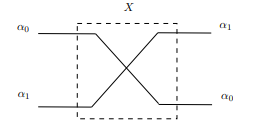


# EJEMPLO:

Implementaremos un circuito cuantico de un solo qubit con las operaciones siguientes:

Para el qubit en estado:  $$|\psi\rangle = \alpha_0|0\rangle + \alpha_1|1\rangle$$  

Con:
- $\alpha_0 = 0$
- $\alpha_1 = 1$

Aplicamos:


1.  X
2.  H
3.  X

Moatramos el circuito y la posicion inicial y final en la esfera de bloch

##Solucion:

Aplicamos $X$ al estado $|1\rangle$:

$$
X|1\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle
$$

Aplicamos $H$ al estado $|0\rangle$:

$$
H|0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$

Aplicamos $X$ al resultado anterior:

$$
X \left( \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} \right) = \frac{1}{\sqrt{2}} \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}
$$
Vemos que:

$$
\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} =\frac{1}{\sqrt{2}}( \begin{pmatrix} 1 \\ 0 \end{pmatrix}+\begin{pmatrix} 0 \\ 1 \end{pmatrix})
$$

El estado final del qubit es una superposición uniforme:

$$
|\psi_{\text{final}}\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) = \frac{\sqrt{2}}{2}(|0\rangle + |1\rangle)
$$

Esto significa que al medir el qubit, obtendremos $|0\rangle$ o $|1\rangle$ con igual probabilidad del 50%.

In [55]:
#IMPLEMENTACION:

# Creamos un circuito cuAntico de 1 qubit
qc = QuantumCircuit(1)

# Estado inicial  en |1⟩
initial_state = Statevector.from_label('1')
print("Estado inicial:")
display(initial_state.draw('latex'))

Estado inicial:


<IPython.core.display.Latex object>

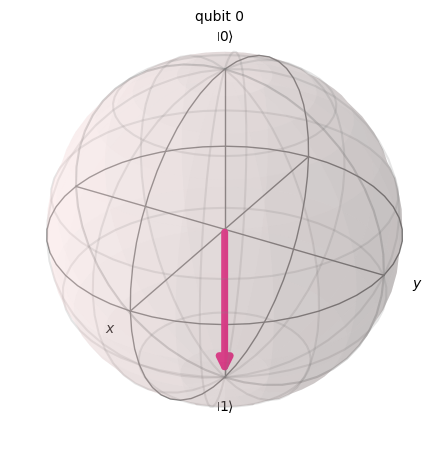

In [56]:
#en la esfera de Bloch
plot_bloch_multivector(initial_state)

Circuito Cuántico:


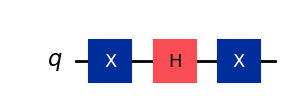

In [57]:
# Aplicamos compuerta X
qc.append(XGate(), [0])

# Aplicamos compuerta H
qc.append(HGate(), [0])

# Aplicamos otra vez compuerta X
qc.append(XGate(), [0])

# Visualizamos el circuito
print("Circuito Cuántico:")
display(qc.draw('mpl'))

Estado final:


<IPython.core.display.Latex object>

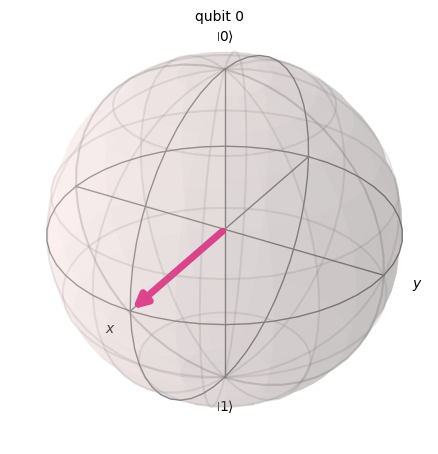

In [58]:
# Simulamos la evolucion del estado
final_state = initial_state.evolve(qc)

# Estado final
print("Estado final:")
display(final_state.draw('latex'))

# Visualización en la esfera de Bloch
plot_bloch_multivector(final_state)



#RERESENTACIONES DE LAS COMPUERTAS CUANTICAS


---

##Las compuertas cuánticas como transformaciones de cambio de base

---

En la computación cuántica, las compuertas cuánticas se describen mediante matrices unitarias, las cuales transforman los estados cuánticos sin alterar su norma. Una interpretación fundamental  es que toda compuerta cuántica puede verse como un cambio de base en el espacio de Hilbert de los qubits.

Una base ortonormal en el espacio de Hilbert $\mathbb{C}^2$  está compuesta por dos vectores unitarios ortogonales, como por ejemplo la base computacional:

$$
|0\rangle = \begin{bmatrix}1 \\ 0\end{bmatrix}, \quad
|1\rangle = \begin{bmatrix}0 \\ 1\end{bmatrix}
$$

También existen otras bases, como la base diagonal:

$$
|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right), \quad
|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)
$$

Cualquier compuerta cuántica unitaria $U$ puede expresarse como una transformación de base de la forma:

$$
U = |v_0\rangle\langle u_0| + |v_1\rangle\langle u_1|
$$

donde $\{|u_0\rangle, |u_1\rangle\}$ y $\{|v_0\rangle, |v_1\rangle\}$ son dos bases ortonormales distintas. Esta ecuación implica que $U$ toma cada vector de la base $\{|u_i\rangle\}$ y lo transforma en su correspondiente en la base $\{|v_i\rangle\}$, es decir:

$$
U|u_i\rangle = |v_i\rangle, \quad \text{para } i = 0, 1
$$

Por linealidad, cualquier qubit que pueda escribirse como combinación de $|u_0\rangle$ y $|u_1\rangle$, es decir:

$$
|\psi\rangle = \alpha_0|u_0\rangle + \alpha_1|u_1\rangle
$$

se transforma como:

$$
U|\psi\rangle = \alpha_0|v_0\rangle + \alpha_1|v_1\rangle
$$


Esta transformación puede visualizarse como una rotación del vector $|\psi\rangle$ al ser reexpresado en una nueva base. En la esfera de Bloch, esto equivale a un cambio de perspectiva en el sistema de coordenadas del estado cuántico.

Para ser mas formales una aplicación de $U$ a un vector de la base $\{|u_0\rangle, |u_1\rangle\}$ para un índice $x \in \{0, 1\}$, podemos:

$$
\begin{aligned}
U|u_x\rangle &= \left( |v_0\rangle\langle u_0| + |v_1\rangle\langle u_1| \right) |u_x\rangle \\
&= |v_0\rangle \langle u_0 | u_x \rangle + |v_1\rangle \langle u_1 | u_x \rangle
\end{aligned}
$$

Como la base $ \{|u_0\rangle, |u_1\rangle\} $ es ortonormal:

$$
\langle u_i | u_x \rangle = \delta_{ix}
$$

Entonces:

$$
U|u_x\rangle = |v_x\rangle
$$


La figura adjunta ilustra gráficamente cómo un vector $|\psi\rangle$ representado originalmente en la base $\{|u_0\rangle, |u_1\rangle\}$ cambia su representación a una nueva base $\{|v_0\rangle, |v_1\rangle\}$ después de aplicar la compuerta $U$.

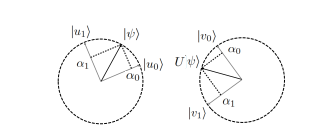

### algunas compuertas

- **Identidad ($I$)**: No altera la base ni el estado.
- **Pauli-X ($X$)**: Intercambia $|0\rangle \leftrightarrow |1\rangle$
- **Pauli-Z ($Z$)**: Cambia el signo de la amplitud de $|1\rangle$
- **Hadamard ($H$)**: Cambia la base computacional $\{|0\rangle, |1\rangle\}$ a la base diagonal $\{|+\rangle, |-\rangle\}$

Por ejemplo, la compuerta Hadamard se puede expresar como:

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

y cumple que:

$$
H|0\rangle = |+\rangle, \quad H|1\rangle = |-\rangle
$$

---

#EJEMPLO:

---

Apliquemos la compuerta hadamard:

Circuito:


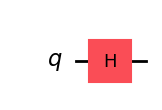

In [59]:
#creamos un circuito cuantico
qc_3 = QuantumCircuit(1)

#fijamos un estado inicial  en |0⟩
initial_state_3 = Statevector.from_label('0')


# Aplicamos la compuerta Hadamard (esta es otra forma sencilla de aplicarla)
qc_3.h(0)

#CIRCUITO
print("Circuito:")
qc_3.draw('mpl')

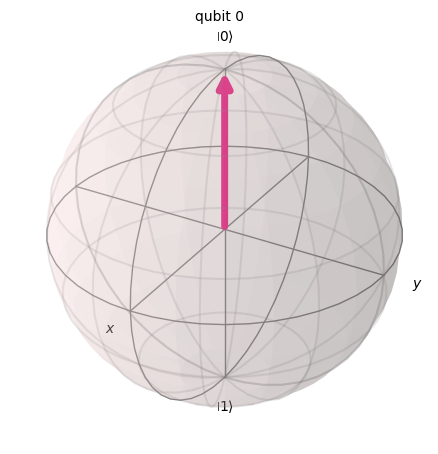

In [60]:
#En la esfera de bloch (estado inicial)
plot_bloch_multivector(initial_state_3)

<IPython.core.display.Latex object>

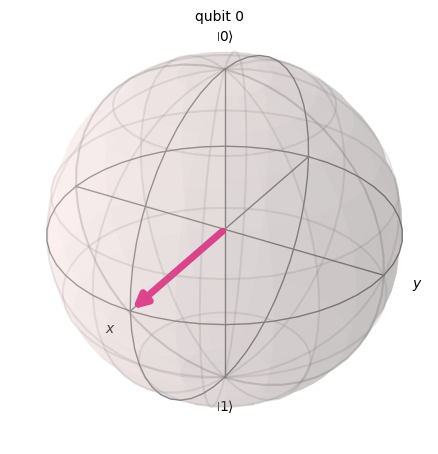

In [61]:
#ecolucionamos el estado
destado_final = initial_state_3.evolve(qc_3)

#mostramos el estado final
display(destado_final.draw('latex'))

#graficamos la esfera
plot_bloch_multivector(destado_final)



El resultado puede ser confuso pero debemos tener en cuenta que

Después de aplicar la compuerta  Hadamard el vector de estado se encuentra en la base $|+\rangle$ y esta se define como:  
$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \quad \text{eje x positivo}
$$

Es decir:

$$
|\psi\rangle = \alpha_+|+\rangle + \alpha_-|- \rangle
$$
con $ \alpha_-  = 0$

hubo un cambio de base!

##Interpretación de las Compuertas Cuánticas como Transformaciones con Autovalores de Módulo Unitario

Una interpretacion alternativa desde el punto de vista algebraico  es su interpretación como transformaciones definidas por su descomposición espectral, es decir, como operadores lineales que actúan sobre estados base mediante autovalores de módulo unitario.

Esta interpretación se fundamenta en el teorema espectral:

$$
AA^\dagger = A^\dagger A
$$
pueden interpretarse como transformaciones definidas por su descomposición espectral. Para una matriz normal $A$, se tiene:

$$
A = \sum_{x=0}^{N-1} \lambda_x |v_x\rangle \langle v_x|
$$

Aquí, los $\lambda_x$ son los autovalores de $A$, generalmente complejos, y los vectores $|v_x\rangle$ forman una base ortonormal del espacio de Hilbert. Esta descomposición también permite definir funciones de matrices:

Dada una función escalar $f(\cdot)$, se define $f(A)$ aplicando $f$ a cada autovalor.
$$
f(A) = \sum_{x=0}^{N-1} f(\lambda_x) |v_x\rangle \langle v_x|
$$
Las matrices unitarias, que constituyen la base de las compuertas cuánticas, son un caso particular de matrices normales. Toda matriz unitaria $U$ cumple:

$$
U^\dagger U = I
$$

Y por tanto, puede expresarse también mediante su descomposición espectral:

$$
U = \lambda_0 |v_0\rangle \langle v_0| + \lambda_1 |v_1\rangle \langle v_1|
$$

En el caso de matrices unitarias, todos los autovalores $\lambda_x$ satisfacen $|\lambda_x| = 1$. Esto implica que la acción de la compuerta sobre cada autovector es simplemente multiplicarlo por una fase compleja, sin cambiar su dirección en el espacio de Hilbert:

$$
U |v_x\rangle = \lambda_x |v_x\rangle
$$

Desde este punto de vista, las compuertas cuánticas no necesariamente "rotan" o "cambian" todos los estados, sino que dejan ciertos estados invariantes salvo por una fase.

Esta visión puede aplicarse a las compuertas de Pauli más comunes:

* La compuerta **Z** tiene como autovectores a $|0\rangle$ y $|1\rangle$, con autovalores $+1$ y $-1$, respectivamente.

* La compuerta **X** tiene como autovectores a:

  $$
  |+\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle), \quad |-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
  $$

* La compuerta **Y** tiene como autovectores a:

  $$
  |+i\rangle = \frac{1}{\sqrt{2}} (|0\rangle + i|1\rangle), \quad |-i\rangle = \frac{1}{\sqrt{2}} (|0\rangle - i|1\rangle)
  $$

llamadas bases Z, X y Y, respectivamente



## Compuertas Cuánticas a partir de Generadores Hermíticos

---

Como hemos visto las compuertas cuánticas se representan mediante matrices unitarias, es decir, matrices que preservan la norma del estado cuántico sobre el que actúan. Otra forma fundamental de describir estas matrices unitarias consiste en expresarlas como exponenciales de matrices hermíticas, también conocidas como generadoras.

Una matriz cuadrada  $A \in \mathbb{C}^{2 \times 2}$ es hermítica si es igual a su conjugada transpuesta, es decir:

$$
A^\dagger = A.
$$

Esta propiedad garantiza que $A$  sea  normal, lo que implica que:

$$
A A^\dagger = A^\dagger A.
$$

Gracias al teorema espectral, las matrices hermíticas admiten una descomposición en una base ortonormal de autovectores y tienen autovalores reales. Esto es importante en macanica cuántica, ya que los valores medibles  asociados al generador deben ser reales.

Toda matriz unitaria $U$ puede escribirse como:

$$
U = \exp(-iG),
$$

donde $G$ es una matriz hermítica llamada generador de $U$ O tambien conocido en física como el Hamiltoniano, ya que describe la evolución temporal de un sistema cuántico.

Esta forma se garantiza que $U$ es unitaria, ya que:

$$
U^\dagger U = \exp(iG^\dagger) \exp(-iG) = \exp(iG - iG) = I.
$$

Aquí se usó el hecho de que $G^\dagger = G$.

Un ejemplo  son las compuertas de rotación, que pueden expresarse como la compuerta de rotación en torno al eje $Y$ se define como:

$$
R_Y(\theta) = \exp\left(-i \frac{\theta}{2} Y\right),
$$

De forma similar se definen:

$$
R_X(\theta) = \exp\left(-i \frac{\theta}{2} X\right), \\
R_Z(\theta) = \exp\left(-i \frac{\theta}{2} Z\right).
$$

#EJERCICIOS:

Mostrar las quivalencias:

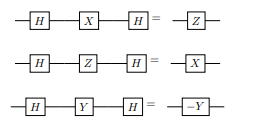


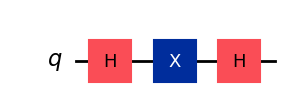

In [63]:
#SOLUCION

#EJERCICIO 1
# defino un estado
state = Statevector.from_label('0')

#creo un circuito de un qbit:
qc = QuantumCircuit(1)
qc.h(0)       # Pauli-X
qc.x(0)       # Hadamard
qc.h(0)       # Pauli-Z

# evolucion del estado en el circuito construido
state_after_x = state.evolve(qc)
qc.draw('mpl')

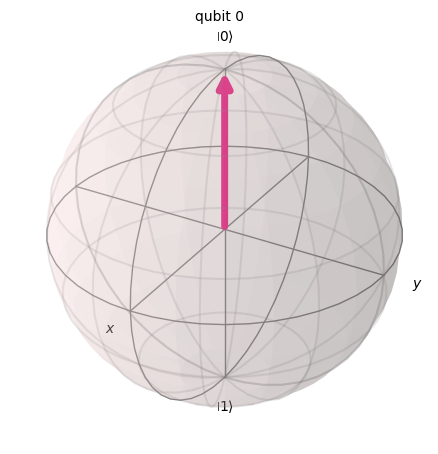

In [64]:
#visualizacion
plot_bloch_multivector(state_after_x)

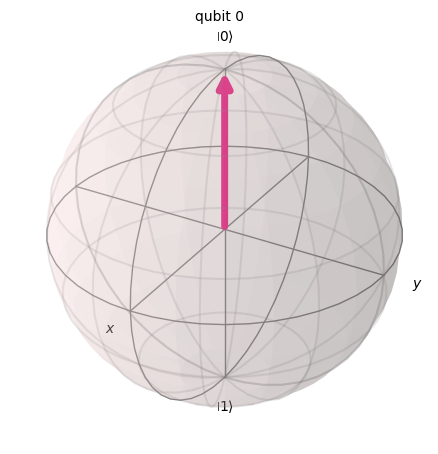

In [73]:
#es el qubit de control

state2_p = Statevector.from_label('0')

#defino el operador:

z_operator = Operator(ZGate())

#hacemos que el estado evolucione

state2p_after_x = state2_p.evolve(z_operator)

# odservamos su evolucion en la esfera de bloch

plot_bloch_multivector(state2p_after_x)

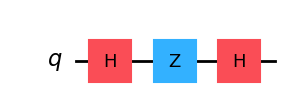

In [66]:
#EJERCICIO 2

state2 = Statevector.from_label('0')

qc_2 = QuantumCircuit(1)
qc_2.h(0)
qc_2.z(0)
qc_2.h(0)

qc_2.draw('mpl')

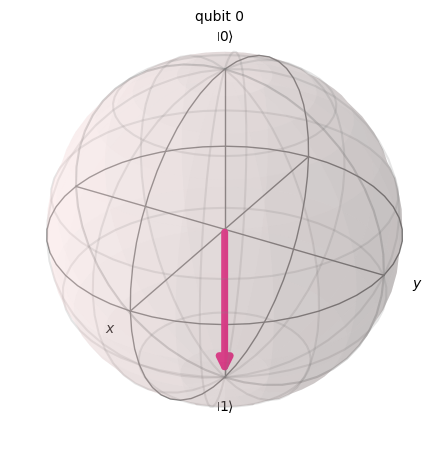

In [67]:
state2 = state2.evolve(qc_2)
plot_bloch_multivector(state2)

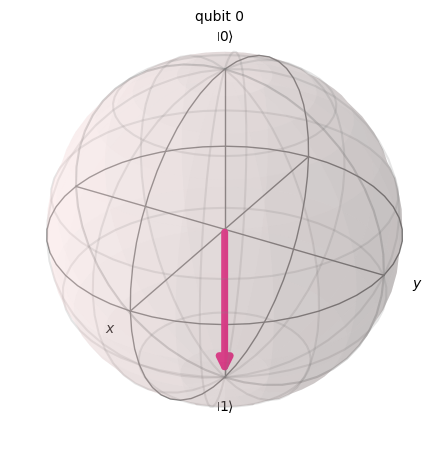

In [72]:
#es el qubit de control

state2_p = Statevector.from_label('0')

#el operador  X fue definido en los ejemplos
#hacemos que el estado evolucione

state2p_after_x = state2_p.evolve(x_operator)

# odservamos su evolucion en la esfera de bloch

plot_bloch_multivector(state2p_after_x)

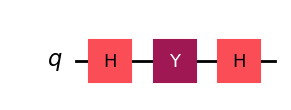

In [75]:
#EJERCICIO 3

state_3 = Statevector.from_label('0')

qc_3 = QuantumCircuit(1)
qc_3.h(0)
qc_3.y(0)
qc_3.h(0)

qc_3.draw('mpl')

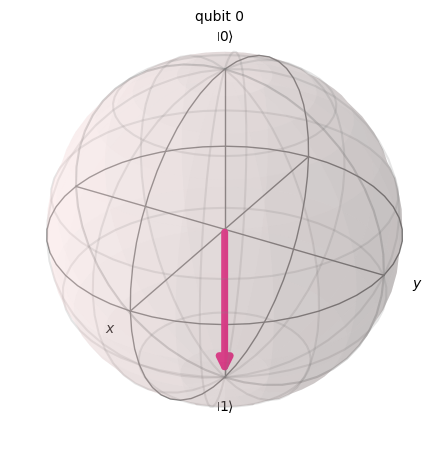

In [76]:
state_3 = state_3.evolve(qc_3)
plot_bloch_multivector(state_3)

In [78]:
#puesto que -Y no es ropiamente una matriz de qiskit, entonces  debemos construirla

# Definimos la matriz -Y = [[0, i], [-i, 0]]
minus_Y = np.array([[0, 1j], [-1j, 0]])

# Creamos la compuerta unitaria
minus_Y_gate = UnitaryGate(minus_Y, label='-Y')

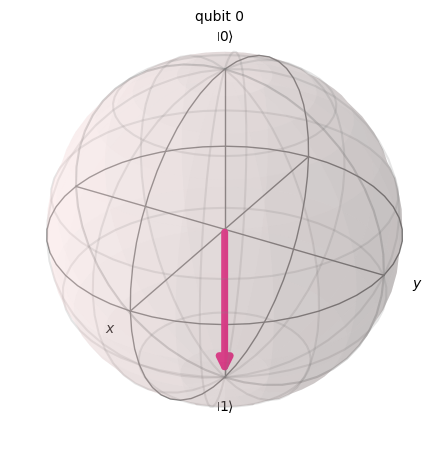

In [79]:
#evolucionamos y comrobamos la respuesta:
state_prueba = Statevector.from_label('0')
state_after_pro = state_prueba.evolve(minus_Y_gate)
plot_bloch_multivector(state_after_pro)